# LeetCode

## Link

1. https://leetcode.com/

2. https://leetcode-cn.com/

## Demo

1. https://www.onlinegdb.com/

## Details

LeetCode: 692, 787, 934

# LeetCode 692. Top K Frequent Words 前K个高频单词

Given an array of strings words and an integer k, return the k most frequent strings.

Return the answer sorted by the frequency from highest to lowest. Sort the words with the same frequency by their lexicographical order.

给定一个单词列表 words 和一个整数 k ，返回前 k 个出现次数最多的单词。

返回的答案应该按单词出现频率由高到低排序。如果不同的单词有相同出现频率， 按字典顺序 排序。


Example 1:

```
Input: words = ["i","love","leetcode","i","love","coding"], k = 2
Output: ["i","love"]
Explanation: "i" and "love" are the two most frequent words.
Note that "i" comes before "love" due to a lower alphabetical order.
解析: "i" 和 "love" 为出现次数最多的两个单词，均为2次。注意，按字母顺序 "i" 在 "love" 之前。
```

Example 2:

```
Input: words = ["the","day","is","sunny","the","the","the","sunny","is","is"], k = 4
Output: ["the","is","sunny","day"]
Explanation: "the", "is", "sunny" and "day" are the four most frequent words, with the number of occurrence being 4, 3, 2 and 1 respectively.
解析: "the", "is", "sunny" 和 "day" 是出现次数最多的四个单词，出现次数依次为 4, 3, 2 和 1 次。
```

Constraints:

- 1 <= words.length <= 500
- 1 <= words[i] <= 10
- words[i] consists of lowercase English letters.
- k is in the range [1, The number of unique words[i]]

words[i] 由小写英文字母组成。

k 的取值范围是 [1, 不同 words[i] 的数量]

Follow-up: Could you solve it in O(n log(k)) time and O(n) extra space?

进阶：尝试以 O(n log k) 时间复杂度和 O(n) 空间复杂度解决。


In [1]:
from typing import List
class Solution:
    def topKFrequent(self, words: List[str], k: int) -> List[str]:
        q = []
        dic = collections.defaultdict(int)
        for word in words:
            dic[word] += 1
        
        for key, val in dic.items():
            heapq.heappush(q, (-val, key))
        
        return [heapq.heappop(q)[1] for i in range(k)]

# LeetCode 787. Cheapest Flights Within K Stops, K 站中转内最便宜的航班

There are n cities connected by some number of flights. You are given an array flights where flights[i] = [fromi, toi, pricei] indicates that there is a flight from city fromi to city toi with cost pricei.

You are also given three integers src, dst, and k, return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.

有 n 个城市通过一些航班连接。给你一个数组 flights ，其中 flights[i] = [fromi, toi, pricei] ，表示该航班都从城市 fromi 开始，以价格 pricei 抵达 toi。

现在给定所有的城市和航班，以及出发城市 src 和目的地 dst，你的任务是找到出一条最多经过 k 站中转的路线，使得从 src 到 dst 的 价格最便宜 ，并返回该价格。 如果不存在这样的路线，则输出 -1。

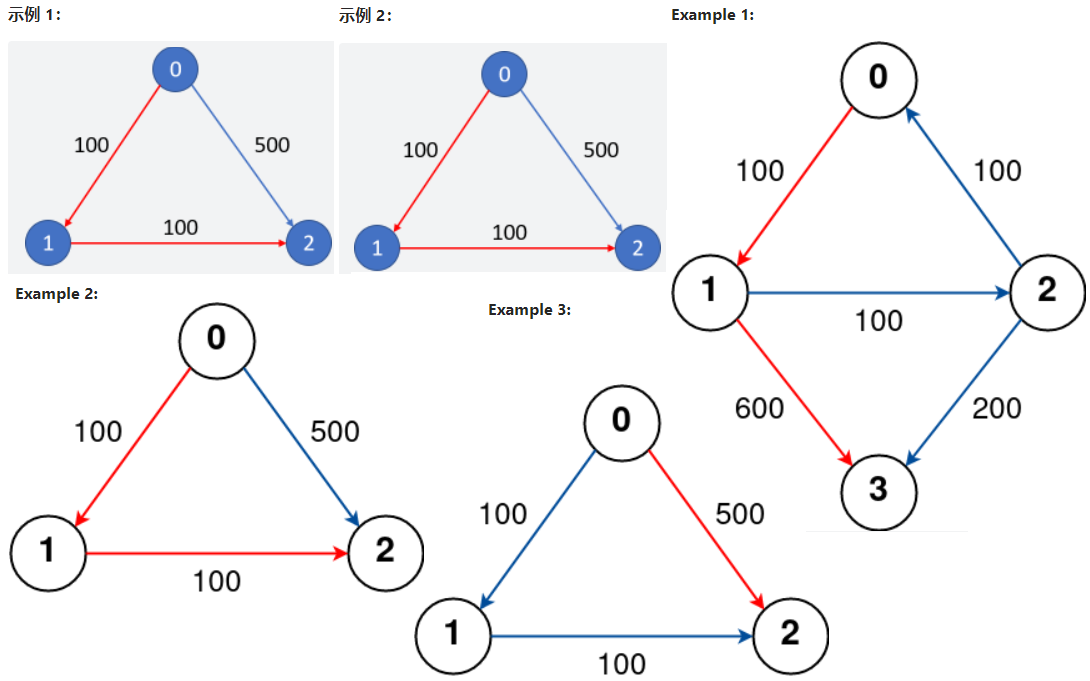

Example 1:

```
Input: n = 4, flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]], src = 0, dst = 3, k = 1
Output: 700
Explanation:
The graph is shown above.
The optimal path with at most 1 stop from city 0 to 3 is marked in red and has cost 100 + 600 = 700.
Note that the path through cities [0,1,2,3] is cheaper but is invalid because it uses 2 stops.

```

Example 2:

```
Input: n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 1
Output: 200
Explanation:
The graph is shown above.
The optimal path with at most 1 stop from city 0 to 2 is marked in red and has cost 100 + 100 = 200.
```

Example 3:

```
Input: n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 0
Output: 500
Explanation:
The graph is shown above.
The optimal path with no stops from city 0 to 2 is marked in red and has cost 500.
```

示例 1：

```
输入: 
n = 3, edges = [[0,1,100],[1,2,100],[0,2,500]]
src = 0, dst = 2, k = 1
输出: 200
解释: 
城市航班图如下
从城市 0 到城市 2 在 1 站中转以内的最便宜价格是 200，如图中红色所示。
```

示例 2：

```
输入: 
n = 3, edges = [[0,1,100],[1,2,100],[0,2,500]]
src = 0, dst = 2, k = 0
输出: 500
解释: 
城市航班图如下
从城市 0 到城市 2 在 0 站中转以内的最便宜价格是 500，如图中蓝色所示。
```

Constraints:

- 1 <= n <= 100
- 0 <= flights.length <= (n * (n - 1) / 2)
- flights[i].length == 3
- 0 <= fromi, toi < n
- $from_i$ != $to_i$
- 1 <= pricei <= $10^4$
- There will not be any multiple flights between two cities.(航班没有重复，且不存在自环)
- 0 <= src, dst, k < n
- src != dst


In [2]:
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
        if src == dst: return 0
        graph = collections.defaultdict(dict)
        for start,end,cost in flights:
            graph[start][end] = cost

        queue = [(0,0,src)]
        while queue:
            cost, k, end = heapq.heappop(queue)
            if k > K+1 : continue
            if end == dst: return cost
            for key, val in graph[end].items():
                heapq.heappush(queue,(cost+val,k+1,key))
        return -1

# LeetCode 934. Shortest Bridge 最短的桥

You are given an n x n binary matrix grid where 1 represents land and 0 represents water.

An island is a 4-directionally connected group of 1's not connected to any other 1's. There are exactly two islands in grid.

You may change 0's to 1's to connect the two islands to form one island.

Return the smallest number of 0's you must flip to connect the two islands.

在给定的二维二进制数组 A 中，存在两座岛。（岛是由四面相连的 1 形成的一个最大组。）

现在，我们可以将 0 变为 1，以使两座岛连接起来，变成一座岛。

返回必须翻转的 0 的最小数目。（可以保证答案至少是 1 。）


Example 1:

```
Input: grid = [[0,1],[1,0]]
Output: 1
```

Example 2:

```
Input: grid = [[0,1,0],[0,0,0],[0,0,1]]
Output: 2
```

Example 3:

```
Input: grid = [[1,1,1,1,1],[1,0,0,0,1],[1,0,1,0,1],[1,0,0,0,1],[1,1,1,1,1]]
Output: 1
```

Constraints:

- n == grid.length == grid[i].length
- 2 <= n <= 100
- grid[i][j] is either 0 or 1.
- There are exactly two islands in grid.

```
/* 思路: DFS + BFS */
/* 先用深度优先搜索DFS, 找到第1个岛屿, 将岛屿元素置为2, 并入队   */
/* 再用广度优先搜索BFS, 从第1个岛屿元素开始向外寻找, 找到的0置为2 */
/* 当找到第一个1时, 就返回寻找的路径step                       */

/* 队列结构体定义 */
typedef struct {
    int x;
    int y;
    int step;
} Queue;

/* DFS 寻找第一个岛屿元素 */
void dfs(int **A, int ASize, int i, int j, Queue *Q, int *rear) {
    if (i < 0 || i >= ASize || j < 0 || j >= ASize || A[i][j] != 1) {
        return;
    }
    /* 元素置为2, 并入队, step置为0 */
    A[i][j]           = 2;
    Q[(*rear)].x      = i;
    Q[(*rear)].y      = j;
    Q[(*rear)++].step = 0;

    /* 上下左右继续寻找 */
    dfs(A, ASize, i - 1, j, Q, rear); 
    dfs(A, ASize, i + 1, j, Q, rear);
    dfs(A, ASize, i, j - 1, Q, rear);
    dfs(A, ASize, i, j + 1, Q, rear);
    return;
}

int shortestBridge(int** A, int ASize, int* AColSize){
    Queue *Q = (Queue*)malloc(sizeof(Queue) * ASize * ASize);
    int front = 0;
    int rear  = 0;
    int find  = 0;
    int i, j, x, y, xx, yy, step;
    int xShift[] = {-1, 1,  0, 0};
    int yShift[] = { 0, 0, -1, 1};

    /* DFS第一个岛屿 */
    for (i = 0; i < ASize; i++) {
        for (j = 0; j < ASize; j++) {
            if (A[i][j] == 1) {
                dfs(A, ASize, i, j, Q, &rear);
                find = 1;
                break;
            }
        }
        /* 只寻找第一个岛屿 */
        if (find == 1) {
            break;
        }
    }

    /* BFS 第一个岛屿向外扩散 */
    while (front != rear) {
        x    = Q[front].x;
        y    = Q[front].y;
        step = Q[front++].step;

        /* 上下左右扩散 */
        for (i = 0; i < 4; i++) {
            xx = x + xShift[i];
            yy = y + yShift[i];
            if (xx < 0 || xx >= ASize || yy < 0 || yy >= ASize || A[xx][yy] == 2) {
                continue;
            }
            if (A[xx][yy] == 1) { /* 找到另一岛屿时, 返回step */
                return step;
            }
            A[xx][yy]      = 2; /* 将扩散到的0置为2, 并入队 */
            Q[rear].x      = xx;
            Q[rear].y      = yy;
            Q[rear++].step = step + 1;
        }
    }
    free(Q);
    return step;
}
```

In [3]:
from collections import deque
from typing import List
class Solution:
    def shortestBridge(self, grid: List[List[int]]) -> int:
        def dfs(grid, x, y):
            grid[x][y] = 0
            seen.append([x, y])
            seen_set.add(f'{x}#{y}')
            axis = [[x - 1, y], [x + 1, y], [x, y -1], [x, y + 1]]
            for x, y in axis:
                if 0 <= x < m and 0 <= y < n and grid[x][y] == 1:
                    dfs(grid, x, y)
        
        def bfs(grid, seen):
            seen = deque(seen)
            seen_other_flag = False
            level = 0
            while seen:
                for _ in range(len(seen)):
                    x, y = seen.popleft()
                    axis = [[x - 1, y], [x + 1, y], [x, y -1], [x, y + 1]]
                    for x, y in axis:
                        index = f'{x}#{y}'
                        if 0 <= x < m and 0 <= y < n and index not in seen_set:
                            if grid[x][y] == 0:
                                seen.append([x, y])
                                seen_set.add(f'{x}#{y}')
                            else:
                                return level
                level += 1
                

            return level
 
        seen = []
        seen_set = set()
        m = len(grid)
        n = len(grid[0])
        search_flag = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j] == 1 and not search_flag:
                    dfs(grid, i, j)
                    search_flag = 1
        level = bfs(grid, seen)
        return level